## Exploratory Data Analysis:

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [190]:
df = pd.read_csv('../data/raw/data.csv')
df = df.drop(columns=['Unnamed: 32', 'id'])

In [191]:
display(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [192]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    str    
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  569 non-null

In [193]:
df.shape

(569, 31)

In [194]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [195]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [196]:
df.describe(include=['O'])

C:\Users\mathm\AppData\Local\Temp\ipykernel_6504\69473401.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include=['O'])


,diagnosis
count,569
unique,2
top,B
freq,357


In [197]:
# Distribuição da variável alvo:

df.describe(include=[df.diagnosis.dtype])

,diagnosis
count,569
unique,2
top,B
freq,357


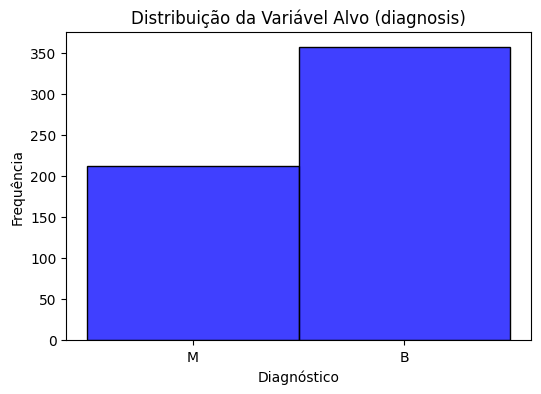

In [198]:
plt.figure(figsize=(6, 4))
sns.histplot(df.diagnosis, bins=20, color='blue')
plt.title('Distribuição da Variável Alvo (diagnosis)')
plt.xlabel('Diagnóstico')
plt.ylabel('Frequência')
plt.show()

In [199]:
# Label encoding para a variável alvo:

df['diagnosis_encoded'] = LabelEncoder().fit_transform(df['diagnosis'])
df = df.drop(columns=['diagnosis'])

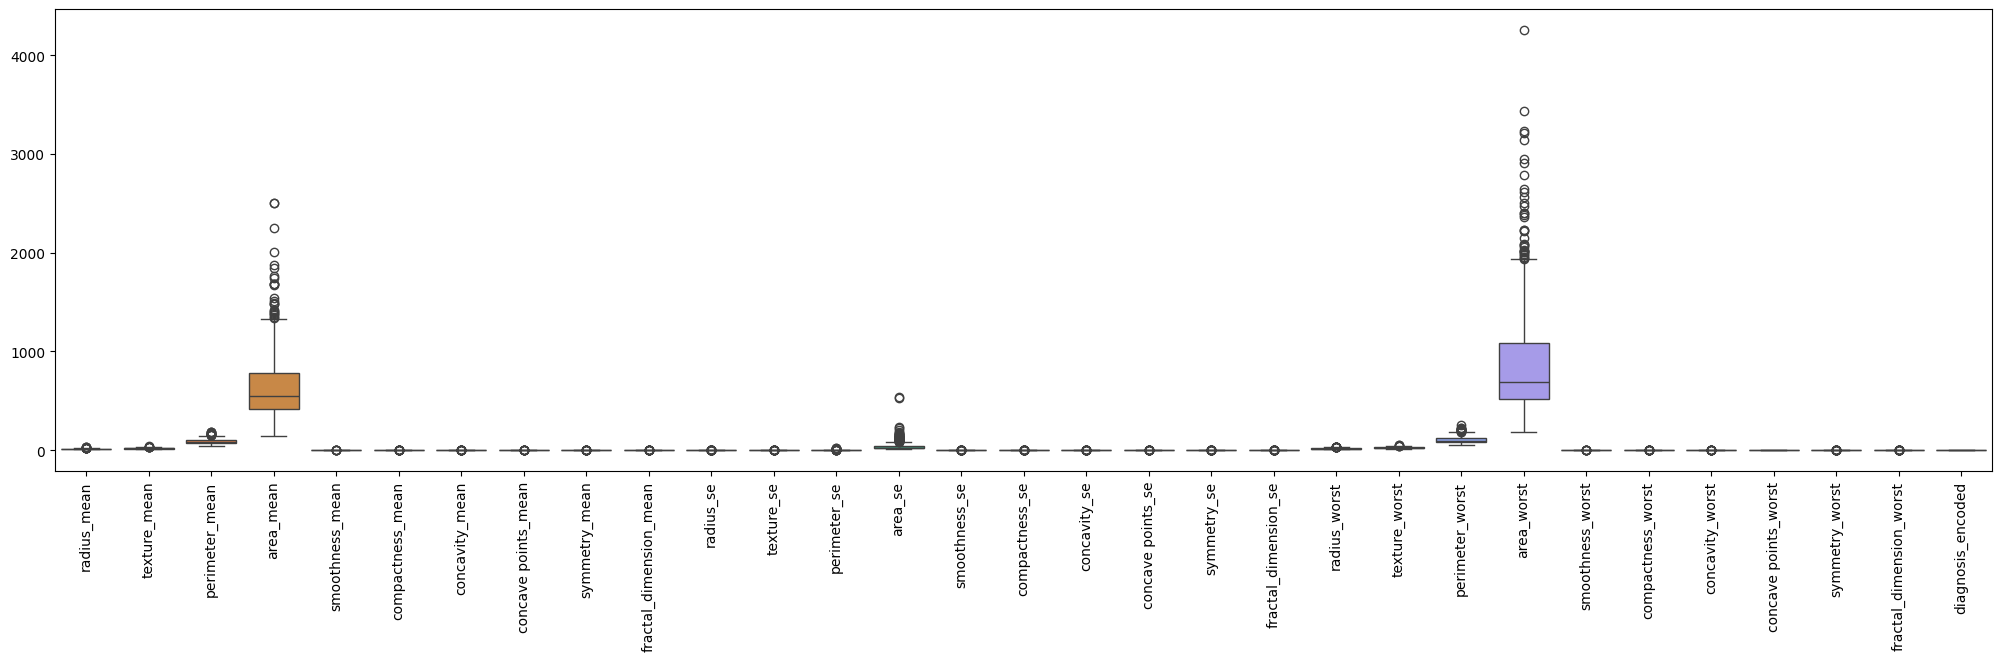

In [200]:
# Detectando outliers:

plt.figure(figsize=(25, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [201]:
# Verificação de necessidade de tratamento de outliers:

X = df.drop("diagnosis_encoded", axis=1)
y = df["diagnosis_encoded"]

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = ((X < lower_bound) | (X > upper_bound))
outliers_rows = outliers_mask.any(axis=1)

print("Total de linhas com outliers:", outliers_rows.sum())

Total de linhas com outliers: 171


In [202]:
outliers_class = y[outliers_rows].value_counts()
inliers_class = y[~outliers_rows].value_counts()

print("Outliers por classe:")
print(outliers_class)

print("\nInliers por classe:")
print(inliers_class)

Outliers por classe:
diagnosis_encoded
1    114
0     57
Name: count, dtype: int64

Inliers por classe:
diagnosis_encoded
0    300
1     98
Name: count, dtype: int64


In [203]:
percent_outliers_class0 = (outliers_class[0] / y.value_counts()[0]) * 100
percent_outliers_class1 = (outliers_class[1] / y.value_counts()[1]) * 100

print(f"Outliers na classe 0: {percent_outliers_class0:.2f}%")
print(f"Outliers na classe 1: {percent_outliers_class1:.2f}%")

Outliers na classe 0: 15.97%
Outliers na classe 1: 53.77%


Text(0.5, 1.0, 'Mapa de Calor das Correlações')

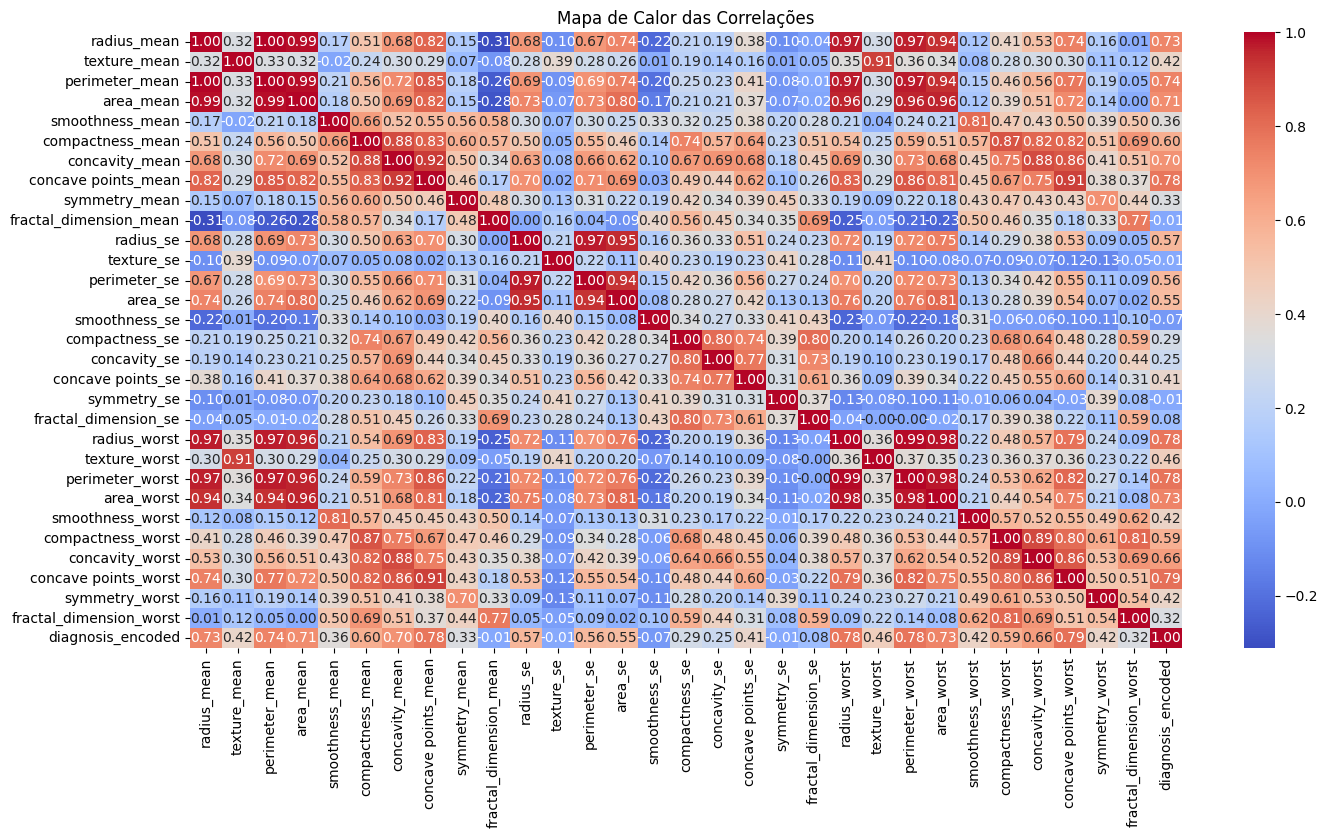

In [204]:
# Matriz de correlação:

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')

### Conclusões:

Ao fazer análise exploratória de dados, podemos colocar alguns pontos em destaque. Ao compreender o dataset e toda a sua estrutura conseguimos identificar padrões e a partir deles construir um plano do que podemos fazer no projeto para que ele fique completo e nos ajude a avaliar corretamente pacientes com tumor benigno ou tumor maligno (câncer).

- Visão geral do dataset: Podemos observar um dataset próprio para medicina com praticamente todas as features contendo dados 100% medicinais coletados durante exames. Isso já nos dá uma boa noção de como devemos lidar com esses dados durante o pré-processamento e treinamento do modelo.

- Distribuição da variável alvo: Podemos ver um maior número de casos de tumores benignos, com a classe de tumor maligno representando uma parcela significativa da base.

- Análise de Outliers: A análise revelou a presença de 171 linhas de pelo menos um oulier, 15.97% dos casos benignos aprensentaram outliers, enquanto 53.77% dos casos malignos. Esses valores não são erros, eles podem representam tumores agressivos reais, por isso removê-los poderia distorcer a distribuição da classe maligna e com isso prejudicar a capacidade de generalização do modelo.

- Matriz de Correlação: Apesar de algumas features terem uma colinearidade fraca e outras sem colinearidade alguma (como podemos observar na matriz de correlação), não iremos trabalhar para removê-las aqui, pois como esse dataset é um dataset de medicina não podemos correr o risco de distorcer diagnósticos removendo os dados.

- Tomada de Decisões: Com as conclusões tiradas dessa análise podemos definir o que fazer no desenvolvimento do modelo utilizando o KNN. Iremos utilizar como métrica de avaliação do modelo o Recall, isso porque estamos tratando de diagnóstico médico e o modelo pode cometer um erro grave erro de classificar um tumor maligno como benigno e para evitar esse Falso Negativo, utilizaremos o recall para termos uma noção de quantos tumores malignos o modelo conseguiu identificar.